# Implementing Random Circuit Sampling on IBM Quantum Devices

## Using IBM Q 5 Yorktown (Manually Operated, with Plots)

Hao Li, Yue Shi, Javad Shabani

New York University

In [1]:
# Import modules to be used in the program

#from qiskit import IBMQ
import numpy as np
from math import *
from qiskit import *
from qiskit.quantum_info import *
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import pauli_error
from qiskit.providers.aer.noise.errors.standard_errors import thermal_relaxation_error
from qiskit.tools.visualization import plot_histogram
from matplotlib import *
import matplotlib.pyplot as plt
import scipy as sp

qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [2]:
# Enable IBM Quantum Experience account, e.g. IBMQ.enable_account('MY_API_TOKEN')
# Do not enable an account more than once in a session

provider = IBMQ.enable_account('')

In [3]:
# Show the backends accessible

provider.backends()
#backend = provider.get_backend('ibmq_rochester')

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

## For each system, run the codes step by step to get all the results

### n-qubit system (n = 3, 4, 5) using ibmqx2

In [4]:
# Choose the number of qubits in the circuits, the number of layers of random circuits, 
# and initialize the sequence number of circuit

n = 5
layers1 = 12

if n not in [3, 4, 5]:
    print("Circuits not available for %d-qubit")

n_circ1 = 0

In [5]:
# n qubit circuits initialization (using ibmqx2)

backend_1 = provider.get_backend('ibmqx2')

# The number of qubits registered
n_reg1 = n

q1 = QuantumRegister(n_reg1)
c1 = ClassicalRegister(n_reg1)
circ1 = QuantumCircuit(q1, c1)

# Generate n-qubit random circuits of a number of layers
n_circ1 += 1

for k in range(0, layers1):
    # For every qubit, add a random unitary u3 gate
    for i in range(0, n):    
        u = quantum_info.random_unitary(2).data
        Theta = 2 * np.arccos(abs(u[0][0]))
        Phi = np.angle(u[1][0] / (u[0][0] * np.sqrt(1 - abs(u[0][0])**2)))
        Lambda =  np.angle(- u[0][1] / (u[0][0] * np.sqrt(1 - abs(u[0][0])**2)))
        Phi += 2 * np.pi * int(- np.sign(Phi) + 0.5)
        Lambda += 2 * np.pi * int(- np.sign(Lambda) + 0.5)
        circ1.u3(Theta, Phi, Lambda, q1[i])
    
    if n == 3:
        # Apply CNOT on a pair of qubits in random direction
        j = np.random.randint(0, n)
        l1 = j
        while l1 == j:
            l1 = np.random.randint(0, n)
        circ1.cx(q1[j], q1[l1])
        print(j, l1)
        # The pair of qubits applied CNOT on are printed in direction
        
    else:
        # Apply CNOT on qubit 0 & 1 in random direction
        l1 = np.random.randint(0, 2)
        if l1 == 0:
            circ1.cx(q1[0], q1[1])
        else:
            circ1.cx(q1[1], q1[0])
        
        if n == 5:
            # Apply CNOT on qubit 3 & 4 in random direction
            l2 = np.random.randint(0, 2)
            if l2 == 0:
                circ1.cx(q1[3], q1[4])
            else:
                circ1.cx(q1[4], q1[3])
                
        # Apply CNOT on qubit 2 & a random qubit in random direction
        j = 2
        while j == 2:
            j = np.random.randint(0, n)
        l3 = np.random.randint(0, 2)
        if l3 == 0:
            circ1.cx(q1[2], q1[j])
        else:
            circ1.cx(q1[j], q1[2])
        
        if n == 4:
            print(j, " ", l1, l3)
        else:
            print(j, " ", l1, l2, l3)
        # The qubits attached to qubit 2, and directions of CNOT's in each layer are printed

4   1 0 0
3   0 0 0
4   0 0 1
0   1 1 0
0   0 0 0
3   0 0 1
4   0 1 0
0   1 0 0
4   0 0 1
4   1 1 1
1   0 0 0
4   0 0 0


In [6]:
# Load an OpenQasm file (without measurement) into a Quantum Circuit for statevector simulation
# (circ1 = QuantumCircuit.from_qasm_file("path/filename.qasm"))

#circ1 = QuantumCircuit.from_qasm_file("5_qubit_circuit_ibmqx2_no_mea_L14_C1.qasm")
#circ1.draw(output = 'mpl')

JOB ID: 0292a8b1-a2e6-4b0e-8c4e-c22e4b72655b

F_XEB_statevector  =  1.1035622991724423 1.0980318604635473
F_LXEB_statevector =  1.2241164887398808 1.1828896613253477


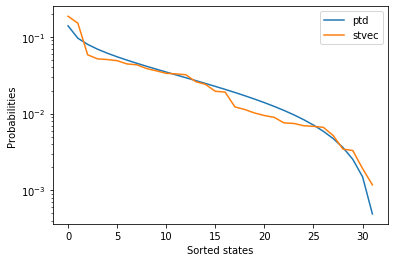

In [7]:
# Run it on statevector_simulator to work out the state amplitudes, 
# If the output stably follows the Porter-Thomas distribution, you may decide 
# whether to use fewer cycles. If not, then you have to increase the number of cycles

circuit = circ1
simulator = Aer.get_backend('statevector_simulator')

job1 = execute(circuit, simulator)
result1 = job1.result()
jobID1 = job1.job_id()
print('JOB ID: {}\n'.format(jobID1))

# Or retrieve a previous job (job1 = simulator.retrieve_job(jobID1))
#job1 = simulator.retrieve_job(457c9e74-7bc5-491a-807f-bb3cc482bfa6)
#result1 = job1.result().get_counts(circ1)

# Get the statevector from result1()
statevector1 = result1.get_statevector(circuit)

# Normalize (state1 with data cleaning order) to receive the probabilities and sort (state1_sort)
state1 = []
stvec1 = []

for i in range(0, 2**n_reg1): # 2^the number of qubits registered
    if abs(statevector1[i]) != 0:
        state1.append(np.abs(statevector1[i])**2)
        stvec1.append(statevector1[i])
        
state1 = np.array(state1)
state1_sort = - np.sort(- state1)

# Save the statevector simulation results to a file (in data cleaning order)
stvec1 = np.array(stvec1)
data1 = np.column_stack((stvec1, state1))

filename = "%d-qubit_%s_stvec_L%d_C%d_%s.csv" % (n, backend_1, layers1, n_circ1, jobID1) 
np.savetxt(filename, data1, delimiter = ',')

# Ideal (discrete) Porter-Thomas distribution
N = 2**n

f = []

for i in range(0, N):
    if i == 0:
        f.append((log(N / (i + 1)) + 1) / N)
    else:
        f.append((log(N / (i + 1)) + 1 - i * log ((i + 1) / i)) / N)

# Cross-entropy benchmarking fidelities of statevector simulation (original and simplified) 
# to see how well the simulation results converge to the Porter Thomas distribution
# The fidelities should converge to 1, showing the results follow the Porter-Thomas distribution
S_inc_ptd = 0
S_exp_ptd = 0
S_ptd = 0

for i in range(0, N):
    S_inc_ptd += - log(f[i]) / N
    S_exp_ptd += - log(f[i]) * state1_sort[i]
    S_ptd += - log(f[i]) * f[i]

F_XEB_5_stvec = (S_inc_ptd - S_exp_ptd) / (S_inc_ptd - S_ptd)
F_XEB_sim_5_stvec = log(N) + np.euler_gamma - S_exp_ptd
print('F_XEB_statevector  = ', F_XEB_5_stvec, F_XEB_sim_5_stvec)

# Linear cross-entropy benchmarking fidelities of statevecror simulation (original and simplified)
SL_inc_ptd = 0
SL_exp_ptd = 0
SL_ptd = 0

for i in range(0, N):
    SL_inc_ptd += (1 - f[i]) / N
    SL_exp_ptd += (1 - f[i]) * state1_sort[i]
    SL_ptd += (1 - f[i]) * f[i]

F_LXEB_5_stvec = (SL_inc_ptd - SL_exp_ptd) / (SL_inc_ptd - SL_ptd)
F_LXEB_sim_5_stvec = 2**n * (1 - SL_exp_ptd) - 1
print('F_LXEB_statevector = ', F_LXEB_5_stvec, F_LXEB_sim_5_stvec)

# Compare the Porter-Thomas distribution with the sorted probabilities
plt.plot(f)
plt.plot(state1_sort)

plt.legend(['ptd', 'stvec'])
plt.xlabel('Sorted states')
plt.ylabel('Probabilities')
plt.yscale('log')

# The log plot of the sorted statevector amplitudes of all 2^n states (bitstrings) is printed
# If it satisfies the Porter-Thomas distribution, this circuit can be used. Go to the next steps

In [8]:
# Save the circuit (without measurement) for statevector simulation as an OpenQasm file

circ1.qasm()
file = open("%d_qubit_circuit_%s_no_mea_L%d_C%d.qasm" % (n, backend_1, layers1, n_circ1), 'w')
file.write(circ1.qasm())
file.close()

In [9]:
# Apply measurement gates to the circuit, so that you can run it on IBM device

for i in range(0, n):
    circ1.measure(q1[i], c1[i])

33


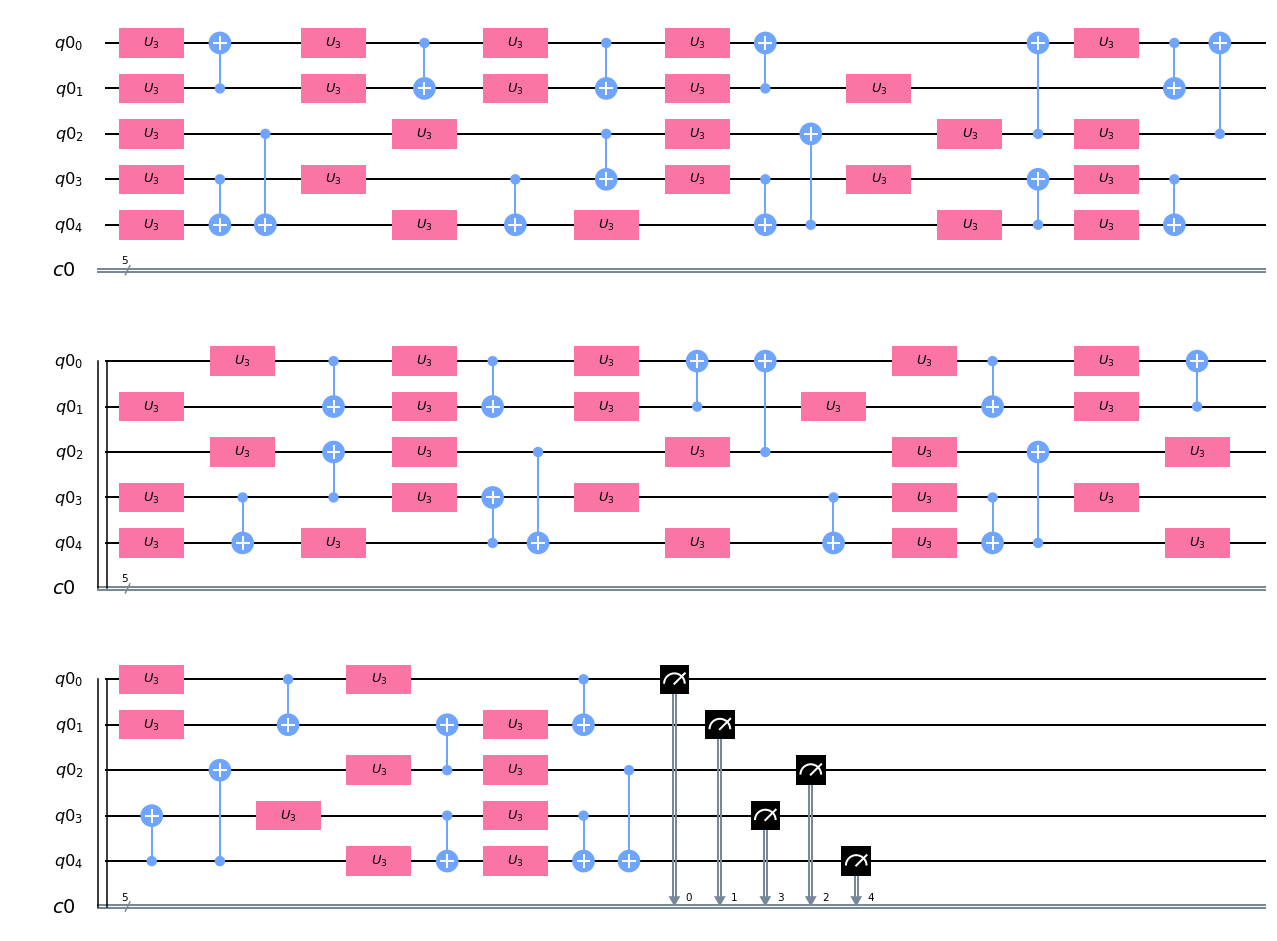

In [10]:
print(circ1.depth())
circ1.draw(output = 'mpl')

In [11]:
# Save the circuit as an OpenQasm file

circ1.qasm()
file = open("%d_qubit_circuit_%s_L%d_C%d.qasm" % (n, backend_1, layers1, n_circ1), 'w')
file.write(circ1.qasm())
file.close()

In [12]:
# Load an OpenQasm file into a Quantum Circuit 
# (circ1 = QuantumCircuit.from_qasm_file("path/filename.qasm"))

#circ1 = QuantumCircuit.from_qasm_file("5_qubit_circuit_ibmqx2_L14_C1.qasm")
#circ1.draw(output = 'mpl')

BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=1, status_msg='active')
JOB ID: 5ebf0d5c927380001bb7ff43


Text(0, 0.5, 'Probabilities')

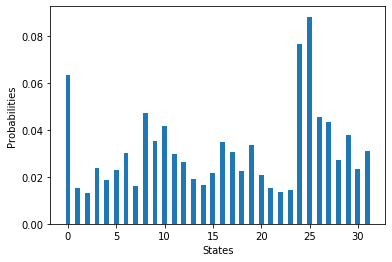

In [13]:
# Run it on actual IBM system (ibmqx2)

runs1 = 1

counts_1_total = []
prob_1_total = []
jobID_1 = []

for run in range(1, runs1 + 1):
    shots_1 = 8192
    
    backend_1 = provider.get_backend('ibmqx2')
    print(backend_1.status())
    job_1 = execute(circ1, backend_1, shots = shots_1)
    result_1 = job_1.result().get_counts(circ1)
    #print(result_1)
    jobID_1.append(job_1.job_id())
    print('JOB ID: {}'.format(jobID_1[run - 1]))
    
    # Or retrieve a previous job (job_1 = backend.retrieve_job(jobID_1[i]))
    #job_1 = backend.retrieve_job(5ebcbe5c4ec39b001364ff17)
    #result_1 = job_1.result().get_counts(circ1)
    
# Data cleaning states(st_1), corresponding experimental counts(counts_1) & probabilities(prob_1)
    st = []
    counts = []
    prob = []
    
    for i in range(0, 2**n_reg1):
        s = '0' * n_reg1
        bin_i = np.binary_repr(i)
        
        s_i = s[0: n_reg1 - len(bin_i)] + bin_i
        st.append(s_i)
        prob.append(np.abs(statevector1[i])**2)
        try:
            counts.append(result_1[s_i])
        except:
            counts.append(0)
            
    st_1 = []
    counts_1 = []
    prob_1 = []
    for i in range(len(prob)):
        if prob[i] != 0:
            st_1.append(st[i])
            counts_1.append(counts[i])
            prob_1.append(counts[i] / shots_1) 
        #print(st_1[i], counts_1[i], prob_1[i])
    
    if run == 1:
        counts_1_total = np.array(counts_1)
    else:
        counts_1_total = np.array(counts_1_total) + np.array(counts_1)
    
    # Save the experimental results to files separately
    data_1 = np.column_stack((counts_1, prob_1))
    
    filename = "%d-qubit_%s_L%d_C%d_R%d_%s.csv" % (n, backend_1, layers1, n_circ1, run, 
                                                   jobID_1[run - 1]) 
    np.savetxt(filename, data_1, delimiter = ',')
    
# Save the total counts and probabilities of all these results
prob_1_total = np.array(counts_1_total) / (runs1 * shots_1)
data_1_total = np.column_stack((counts_1_total, prob_1_total))

filename = "%d_qubit_%s_L%d_C%d_R%d_total.csv" % (n, backend_1, layers1, n_circ1, runs1)
np.savetxt(filename, data_1_total, delimiter = ',')

# Histogram of the experimental results (for a single run or the total results)
#plot_histogram(result_1)
x = np.arange(len(prob_1_total))
plt.bar(x,prob_1_total,width = 0.5)
plt.xlabel('States')
plt.ylabel('Probabilities')

BackendStatus(backend_name='qasm_simulator', backend_version='0.3.0', operational=True, pending_jobs=0, status_msg='')
JOB ID: 5e430925-2295-4da7-8c42-65b3ce75ea22
F_XEB_qasm  =  1.1044696801041338 1.0989249315825922
F_LXEB_qasm =  1.2268672572319477 1.1855477871163949

Experimental Fidelities
F_XEB       =  0.3040045013078131 0.311802780739034
F_LXEB      =  0.15282427357741105 0.245966374874115
F_kXEB      =  0.06475868555543152 0.2924681923541357 , k =  2
F_kXEB      =  0.029088263859480896 0.36898868551585257 , k =  3
F_kXEB      =  0.013547955962544784 0.39856958148738697 , k =  4
F_kXEB      =  0.004756524235282278 0.35316371584440187 , k =  5
F_kXEB      =  -0.0014980590213070234 0.25594843862314187 , k =  6
F_kXEB      =  0.22485810202295536 0.25699220668904843 , k = 1 / 2
F_kXEB      =  0.2514444469754904 0.26855506190715683 , k = 1 / 3
F_kXEB      =  0.26482776622435794 0.27642825681455374 , k = 1 / 4
F_kXEB      =  0.2728235995293348 0.28195963608248387 , k = 1 / 5
F_kXEB   

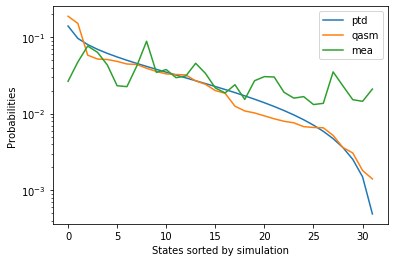

In [14]:
# Run it on Qasm simulator to simulate results on classical computer

shots_2 = 131072

simulator = Aer.get_backend('qasm_simulator')
print(simulator.status())

math_domain_error = True
while math_domain_error == True:
    math_domain_error = False
    
    job_2 = execute(circ1, simulator, shots = shots_2)
    result_2 = job_2.result().get_counts(circ1)
    #print(result_2)
    jobID_2 = job_2.job_id()
    print('JOB ID: {}'.format(jobID_2))
    
    # Or retrieve a previous job (job_2 = simulator.retrieve_job(jobID_2))
    #job_2 = simulator.retrieve_job(457c9e74-7bc5-491a-807f-bb3cc482bfa6)
    #result_2 = job_2.result().get_counts(circ1)
    
    # Data cleaning states(st_2), corresponding simulated counts(counts_2) & probabilities(prob_2)
    st = []
    counts = []
    prob = []
    
    for i in range(0, 2**n_reg1):
        s = '0' * n_reg1
        bin_i = np.binary_repr(i)
        
        s_i = s[0: n_reg1 - len(bin_i)] + bin_i
        st.append(s_i)
        prob.append(np.abs(statevector1[i])**2)
        try:
            counts.append(result_2[s_i])
        except:
            counts.append(0)
    
    st_2 = []
    counts_2 = []
    prob_2 = []
    for i in range(len(prob)):
        if prob[i] != 0:
            st_2.append(st[i])
            if counts[i] == 0:
                math_domain_error = True
            counts_2.append(counts[i])
            prob_2.append(counts[i] / shots_2)
            #print(st_2[i], counts_2[i], prob_2[i])
            
    if math_domain_error == True:
        print('Encounter zero count(s) in Qasm simulation!\n')
        
# Save the qasm simulation results to a file (in data cleaning order)
data_2 = np.column_stack((counts_2, prob_2))

filename = "%d-qubit_%s_qasm_L%d_C%d_%s.csv" % (n, backend_1, layers1, n_circ1, jobID_2) 
np.savetxt(filename, data_2, delimiter = ',')

# Sort the Qasm simulation results and experimental results by Qasm simulation (descending)
prob_1_total_sort = []
prob_2_sort = []

prob_1_total_sort = np.array(prob_1_total)
prob_2_sort = - np.array(prob_2)
prob_2_sort, prob_1_total_sort = zip(*sorted(zip(prob_2_sort, prob_1_total_sort)))
prob_2_sort = - np.array(prob_2_sort)

# Ideal (discrete) Porter-Thomas distribution
N = 2**n

f = []

for i in range(0, N):
    if i == 0:
        f.append((log(N / (i + 1)) + 1) / N)
    else:
        f.append((log(N / (i + 1)) + 1 - i * log ((i + 1) / i)) / N)
        
# Cross-entropy benchmarking fidelities of Qasm simulation (original and simplified) 
# to see how well the simulation results converge to the Porter Thomas distribution
# The fidelities should converge to 1, showing the results follow the Porter-Thomas distribution
S_inc_ptd = 0
S_exp_ptd = 0
S_ptd = 0

for i in range(0, N):
    S_inc_ptd += - log(f[i]) / N
    S_exp_ptd += - log(f[i]) * prob_2_sort[i]
    S_ptd += - log(f[i]) * f[i]

F_XEB_5_qasm = (S_inc_ptd - S_exp_ptd) / (S_inc_ptd - S_ptd)
F_XEB_sim_5_qasm = log(N) + np.euler_gamma - S_exp_ptd
print('F_XEB_qasm  = ', F_XEB_5_qasm, F_XEB_sim_5_qasm)

# Linear cross-entropy benchmarking fidelities of Qasm simulation (original and simplified)
SL_inc_ptd = 0
SL_exp_ptd = 0
SL_ptd = 0

for i in range(0, N):
    SL_inc_ptd += (1 - f[i]) / N
    SL_exp_ptd += (1 - f[i]) * prob_2_sort[i]
    SL_ptd += (1 - f[i]) * f[i]

F_LXEB_5_qasm = (SL_inc_ptd - SL_exp_ptd) / (SL_inc_ptd - SL_ptd)
F_LXEB_sim_5_qasm = N * (1 - SL_exp_ptd) - 1
print('F_LXEB_qasm = ', F_LXEB_5_qasm, F_LXEB_sim_5_qasm)

print('\nExperimental Fidelities')

# Cross-entropy benchmarking fidelities of experimental results (original and simplified)
S_inc_exp = 0
S_mea_exp = 0
S_exp = 0

for i in range(0, N):
    S_inc_exp += - log(prob_2[i]) / N
    S_mea_exp += - log(prob_2[i]) * prob_1_total[i]
    S_exp += - log(prob_2[i]) * prob_2[i]

F_XEB_5 = (S_inc_exp - S_mea_exp) / (S_inc_exp - S_exp)
F_XEB_sim_5 = log(N) + np.euler_gamma - S_mea_exp
print('F_XEB       = ', F_XEB_5, F_XEB_sim_5)

# Linear cross-entropy benchmarking fidelities of experimental results (original and simplified)
SL_inc_exp = 0
SL_mea_exp = 0
SL_exp = 0

for i in range(0, N):
    SL_inc_exp += (1 - prob_2[i]) / N
    SL_mea_exp += (1 - prob_2[i]) * prob_1_total[i]
    SL_exp += (1 - prob_2[i]) * prob_2[i]

F_LXEB_5 = (SL_inc_exp - SL_mea_exp) / (SL_inc_exp - SL_exp)
F_LXEB_sim_5 = N * (1 - SL_mea_exp) - 1
print('F_LXEB      = ', F_LXEB_5, F_LXEB_sim_5)


# k-th order cross-entropy benchmarking fidelities (k = 2, 3, 4, 5, 6, and inverse) (original)
F_kXEB_5 = []
F_kXEB_sim_5 = []

for k in range(2, 7):
    Sk_inc_exp = 0
    Sk_mea_exp = 0
    Sk_exp = 0
    Pk_mea_exp = 0
    
    for i in range(0, N):
        Sk_inc_exp += (1 - prob_2[i]**k) / N
        Sk_mea_exp += (1 - prob_2[i]**k) * prob_1_total[i]
        Sk_exp += (1 - prob_2[i]**k) * prob_2[i]
        Pk_mea_exp += (prob_2[i]**k) * prob_1_total[i]
        
    F_kXEB_5.append((Sk_inc_exp - Sk_mea_exp) / (Sk_inc_exp - Sk_exp))
    F_kXEB_sim_5.append((Pk_mea_exp * N**k / gamma(k + 1) - 1) / k)
    
    print('F_kXEB      = ', F_kXEB_5[k - 2], F_kXEB_sim_5[k - 2], ', k = ', k)

F_1kXEB_5 = []
F_1kXEB_sim_5 = []

for k in range(2, 7):
    S1k_inc_exp = 0
    S1k_mea_exp = 0
    S1k_exp = 0
    P1k_mea_exp = 0
    
    for i in range(0, N):
        S1k_inc_exp += (1 - prob_2[i]**(1 / k)) / N
        S1k_mea_exp += (1 - prob_2[i]**(1 / k)) * prob_1_total[i]
        S1k_exp += (1 - prob_2[i]**(1 / k)) * prob_2[i]
        P1k_mea_exp += (prob_2[i]**(1 / k)) * prob_1_total[i]
        
    F_1kXEB_5.append((S1k_inc_exp - S1k_mea_exp) / (S1k_inc_exp - S1k_exp))
    F_1kXEB_sim_5.append((P1k_mea_exp * N**(1 / k) / gamma(1 / k + 1) - 1) * k)
    
    print('F_kXEB      = ', F_1kXEB_5[k - 2], F_1kXEB_sim_5[k - 2], ', k = 1 /', k)

# Histogram of simulation results
#plot_histogram(result_2)

# Probabilities of different states by Qasm simulation and experiment sorted by Qasm simulation
plt.plot(f)
plt.plot(prob_2_sort)
plt.plot(prob_1_total_sort)

plt.legend(['ptd', 'qasm', 'mea', 'noise'])
plt.xlabel('States sorted by simulation')
plt.ylabel('Probabilities')
plt.yscale('log')

NoiseModel:
  Basis gates: ['cx', 'id', 'u1', 'u2', 'u3']
  Instructions with noise: ['reset', 'measure', 'cx', 'u3', 'u2', 'id', 'u1']
  All-qubits errors: ['cx', 'u1', 'u2', 'u3', 'id', 'measure', 'reset']
[[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]


BackendStatus(backend_name='qasm_simulator', backend_version='0.3.0', operational=True, pending_jobs=0, status_msg='')
JOB ID: 2ee599a0-f11f-48de-ad81-633844b3c590
F_XEB_qasm_noise  =  0.3449850016450735 0.3514176741570969
F_LXEB_qasm_noise =  0.342462397819442 0.33092866038454005


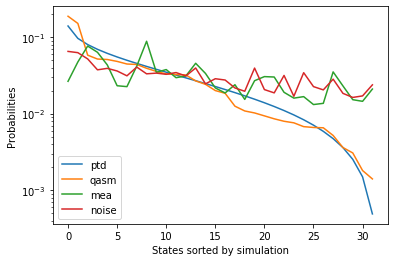

In [15]:
# Build noise model for noise simulation

basis_gates = ['u1', 'u2', 'u3', 'cx', 'id']
noise_model1 = NoiseModel(basis_gates)

p_ui = 0.001 # Single qubit unitary gate Pauli error rate
p_id = 0.001 # Identical gate Pauli error rate

p_cx0 = 0.005 # CNOT Pauli error rate 'XX'
p_cx1 = 0.02 # CNOT Pauli error rate 'XI'
p_cx2 = 0.02 # CNOT Pauli error rate 'IX'

p1given0 = 0.03 # Readout error to get |1> given |0>
p0given1 = 0.03 # Readout error to get |0> given |1>

T1 = 57.6 # Qubit population thermal relaxation time (in microseconds)
T2 = 58.4 # Qubit phase thermal relaxation time (in microseconds)
t1 = 0.05 # Single qubit gate time (in microseconds)
t2 = 0.1 # Two qubit gate time (in microseconds)
esp = 0.001 # Excited state population at equilibrium (default: |0>)

p_mea = 0.01 # Measurement Pauli error rate
p_res = 0.01 # Reset Pauli error rate

error_ui = pauli_error([('X', p_ui), ('I', 1 - p_ui)])
error_id = pauli_error([('X', p_id), ('I', 1 - p_id)])
error_cx = pauli_error([('XX', p_cx0), ('XI', p_cx1), 
                        ('IX', p_cx2), ('II', 1 - p_cx0 - p_cx1 - p_cx2)])
error_ro = [[1 - p1given0, p1given0], [p0given1, 1 - p0given1]]
error_tr1 = thermal_relaxation_error(T1, T2, t1, esp)
error_tr2 = (thermal_relaxation_error(T1, T2, t2, esp).
             expand(thermal_relaxation_error(T1, T2, t2, esp)))
error_mea = pauli_error([('X', p_mea), ('I', 1- p_mea)])
error_res = pauli_error([('X', p_res), ('I', 1 - p_res)])

# All qubit error for each gate can only be applied once
#noise_model1.add_all_qubit_quantum_error(error_ui, ['u1', 'u2', 'u3'])
#noise_model1.add_all_qubit_quantum_error(error_id, 'id')
noise_model1.add_all_qubit_quantum_error(error_cx, 'cx')
noise_model1.add_all_qubit_readout_error(error_ro)
noise_model1.add_all_qubit_quantum_error(error_tr1, ['u1', 'u2', 'u3'])
noise_model1.add_all_qubit_quantum_error(error_tr1, 'id')
#noise_model1.add_all_qubit_quantum_error(error_tr2, 'cx')
noise_model1.add_all_qubit_quantum_error(error_mea, 'measure')
noise_model1.add_all_qubit_quantum_error(error_res, 'reset')
#noise_model1.add_quantum_error(error, 'reset', [1])
#noise_model1.add_nonlocal_quantum_error(error, 'reset', [0], [1])

# Get coupling map from backend
backend_1 = provider.get_backend('ibmqx2')
coupling_map = backend_1.configuration().coupling_map

print(noise_model1)
print(coupling_map)
print('\n')

# Run it on Qasm simulator to simulate results with noise on classical computer
shots_3 = 131072

simulator = Aer.get_backend('qasm_simulator')
print(simulator.status())

job_3 = execute(circ1, simulator, noise_model = noise_model1, 
               coupling_map = coupling_map, shots = shots_3)
result_3 = job_3.result().get_counts(circ1)
#print(result_3)
jobID_3 = job_3.job_id()
print('JOB ID: {}'.format(jobID_3))
    
# Or retrieve a previous job (job_3 = simulator.retrieve_job(jobID_3))
#job_3 = simulator.retrieve_job(457c9e74-7bc5-491a-807f-bb3cc482bfa6)
#result_3 = job_3.result().get_counts(circ1)

# Data cleaning states(st_3), corresponding simulated counts(counts_3) & probabilities(prob_3)
st = []
counts = []
prob = []

for i in range(0, 2**n_reg1):
    s = '0' * n_reg1
    bin_i = np.binary_repr(i)
    
    s_i = s[0: n_reg1 - len(bin_i)] + bin_i
    st.append(s_i)
    prob.append(np.abs(statevector1[i])**2)
    try:
        counts.append(result_3[s_i])
    except:
        counts.append(0) 

st_3 = []
counts_3 = []
prob_3 = []
for i in range(len(prob)):
    if prob[i] != 0:
        st_3.append(st[i])
        counts_3.append(counts[i])
        prob_3.append(counts[i] / shots_3)
        #print(st_3[i], counts_3[i], prob_3[i])
        
# Save the Qasm noise simulation results to a file (in data cleaning order)
data_3 = np.column_stack((counts_3, prob_3))

filename = "%d-qubit_%s_qasm_noise_L%d_C%d_%s.csv" % (n, backend_1, layers1, n_circ1, jobID_3)
np.savetxt(filename, data_3, delimiter = ',')

# Sort the Qasm simulation and noise simulation results by Qasm simulation results (descending)
prob_3_sort = []
prob_2_sort = []

prob_3_sort = np.array(prob_3)
prob_2_sort = - np.array(prob_2)
prob_2_sort, prob_3_sort = zip(*sorted(zip(prob_2_sort, prob_3_sort)))
prob_2_sort = - np.array(prob_2_sort)

# Ideal (discrete) Porter-Thomas distribution
N = 2**n

f = []

for i in range(0, N):
    if i == 0:
        f.append((log(N / (i + 1)) + 1) / N)
    else:
        f.append((log(N / (i + 1)) + 1 - i * log ((i + 1) / i)) / N)
        
# Cross-entropy benchmarking fidelities of Qasm noise simulation (original and simplified) 
S_inc_ptd = 0
S_exp_ptd = 0
S_ptd = 0

for i in range(0, N):
    S_inc_ptd += - log(f[i]) / N
    S_exp_ptd += - log(f[i]) * prob_3_sort[i]
    S_ptd += - log(f[i]) * f[i]

F_XEB_5_qasm_noise = (S_inc_ptd - S_exp_ptd) / (S_inc_ptd - S_ptd)
F_XEB_sim_5_qasm_noise = log(N) + np.euler_gamma - S_exp_ptd
print('F_XEB_qasm_noise  = ', F_XEB_5_qasm_noise, F_XEB_sim_5_qasm_noise)

# Linear cross-entropy benchmarking fidelities of Qasm noise simulation (original and simplified)
SL_inc_exp = 0
SL_mea_exp = 0
SL_exp = 0

for i in range(0, N):
    SL_inc_exp += (1 - f[i]) / N
    SL_mea_exp += (1 - f[i]) * prob_3_sort[i]
    SL_exp += (1 - f[i]) * f[i]

F_LXEB_5_qasm_noise = (SL_inc_exp - SL_mea_exp) / (SL_inc_exp - SL_exp)
F_LXEB_sim_5_qasm_noise = N * (1 - SL_mea_exp) - 1
print('F_LXEB_qasm_noise = ', F_LXEB_5_qasm_noise, F_LXEB_sim_5_qasm_noise)

# Save all the calculated fidelities ((noise) simulation, and experiment)
filename = "%d-qubit_%s_fidelities_L%d_C%d.csv" % (n, backend_1, layers1, n_circ1)
file1 = open(filename, "w")
file1.write("%s\n" % backend_1.status())
file1.write("Number of qubits in the circuit, %d\n" % n)
file1.write("Number of layers of circuits, %d\n" % layers1)
file1.write("Circuit sequence number, %d\n" % n_circ1)
file1.write("Depth of the circuit, %d\n" % circ1.depth())
file1.write("Number of runs (8192 times each), %d\n\n" % runs1)

file1.write("Job ID of simulations and experiments\n")
file1.write("Statevector simulation, %s\n" % jobID1)
file1.write("Qasm simulation, %s\n" % jobID_2)
file1.write("Qasm noise simulation, %s\n" % jobID_3)

for run in range(1, runs1 + 1):
    file1.write("%s experiment %d, %s\n" % (backend_1, run, jobID_1[run - 1]))
file1.write("\n")

file1.write("Fidelities (original and simplified) of simulations and experiment,")
file1.write("Origial idelities, Simplified fidelities, k for k'th order fidelities\n")
file1.write("F_XEB(_sim)_statevector, %.17f, %.17f\n" % (F_XEB_5_stvec, F_XEB_sim_5_stvec))
file1.write("F_LXEB(_sim)_statevector, %.17f, %.17f\n" % (F_LXEB_5_stvec, F_LXEB_sim_5_stvec))
file1.write("F_XEB(_sim)_qasm, %.17f, %.17f\n" % (F_XEB_5_qasm, F_XEB_sim_5_qasm))
file1.write("F_LXEB(_sim)_qasm, %.17f, %.17f\n" % (F_LXEB_5_qasm, F_LXEB_sim_5_qasm))
file1.write("F_XEB(_sim)_qasm_noise, %.17f, %.17f\n" % 
            (F_XEB_5_qasm_noise, F_XEB_sim_5_qasm_noise))
file1.write("F_LXEB(_sim)_qasm_noise, %.17f, %.17f\n" % 
            (F_LXEB_5_qasm_noise, F_LXEB_sim_5_qasm_noise))
file1.write("F_XEB(_sim), %.17f, %.17f\n" % (F_XEB_5, F_XEB_sim_5))
file1.write("F_LXEB(_sim), %.17f, %.17f, 1\n" % (F_LXEB_5, F_LXEB_sim_5))

for k in range (2, 7):
    file1.write("F_kXEB(_sim), %.17f, %.17f, %d\n" % 
                (F_kXEB_5[k - 2], F_kXEB_sim_5[k - 2], k))

for k in range (2, 7):
    file1.write("F_kXEB(_sim), %.17f, %.17f, %.17f, 1/%d\n" % 
                (F_1kXEB_5[k - 2], F_1kXEB_sim_5[k - 2], (1 / k), k))

file1.close()

# Histogram of simulation results
#plot_histogram(result_3)

# Probabilities of states by Qasm (noise) simulations and experiment sorted by Qasm simulation
plt.plot(f) # blue, theoretical
plt.plot(prob_2_sort) # orange, Qasm
plt.plot(prob_1_total_sort) # green, experimental
plt.plot(prob_3_sort) # red, noise Qasm

plt.legend(['ptd', 'qasm', 'mea', 'noise'])
plt.xlabel('States sorted by simulation')
plt.ylabel('Probabilities')
plt.yscale('log')

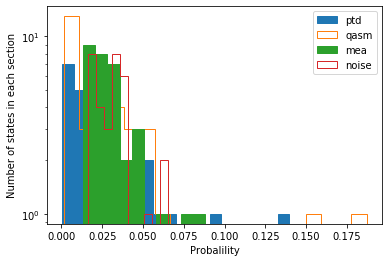

In [16]:
# Histogram of the probabilities

plt.hist(f, bins = 20, histtype = 'step', stacked = True, fill = True) # blue, theoretical
plt.hist(prob_2, bins = 20, histtype = 'step', stacked = True, fill = False) # orange, Qasm
plt.hist(prob_1_total, bins = 10, histtype = 'step', stacked = True, 
         fill = True) # green, ibmqx2
plt.hist(prob_3, bins = 10, histtype = 'step', stacked = True, fill = False) # red, noise Qasm

plt.legend(['ptd', 'qasm', 'mea', 'noise'])
plt.xlabel('Probalility')
plt.ylabel('Number of states in each section')
plt.yscale('log')